In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift, estimate_bandwidth

In [2]:
# Configuration options
num_samples_total = 10000
cluster_centers = [(5,5), (3,3), (1,1)]
num_classes = len(cluster_centers)

In [3]:
# Generate data
X, targets = make_blobs(n_samples = num_samples_total, centers = cluster_centers, n_features = num_classes, center_box=(0, 1), cluster_std = 0.30)

In [4]:
np.save('./clusters.npy',X)
X=np.load('./clusters.npy')

In [5]:
# Estimate bandwith
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

In [ ]:
# Fit Mean Shift with Scikit
meanshift = MeanShift(bandwidth=bandwidth)
meanshift.fit(X)
labels = meanshift.labels_
labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

In [7]:
# Predict the cluster for all the samples
P = meanshift.predict(X)

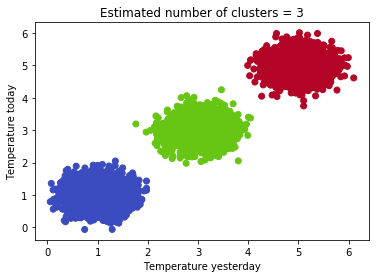

In [8]:
# Generate scatter plot for training data
colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
plt.scatter(X[:,0], X[:,1], c=colors, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('Temperature yesterday')
plt.ylabel('Temperature today')
plt.show()